In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Boston.csv")

In [36]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [38]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
#No Missing Values

In [40]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [41]:
##Independent and dependent features

In [42]:
X = df.drop("medv",axis=1)
y = df["medv"]

In [43]:
#test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
print(X_train.shape,X_test.shape)

(339, 14) (167, 14)


In [45]:
print(y_train.shape,y_test.shape)

(339,) (167,)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

In [47]:
#implementation of LR

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

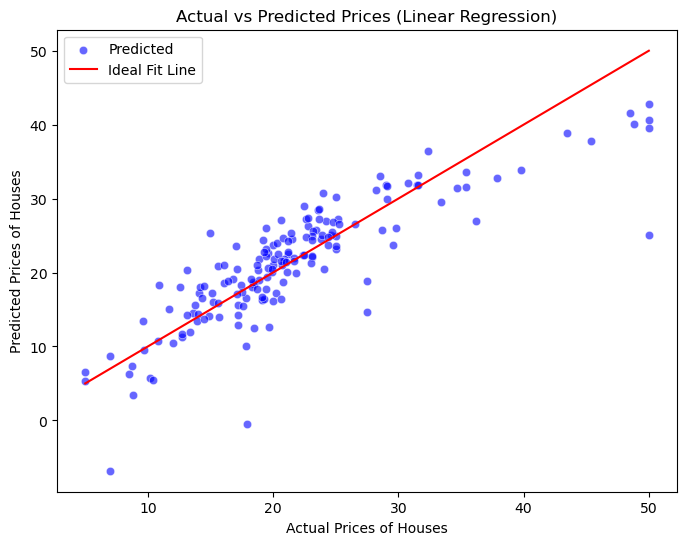

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal Fit Line')
plt.xlabel("Actual Prices of Houses")
plt.ylabel("Predicted Prices of Houses")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()

In [52]:
#Scratch

In [56]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias


def cost_func(X, y, weights, bias):
    num_samples = len(y)
    predictions = predict(X, weights, bias)
    cost = (1 / (2 * num_samples)) * np.sum((predictions - y) ** 2)
    return cost


def compute_gradients(X, y, weights, bias):
    num_samples = len(y)
    predictions = predict(X, weights, bias)
    error = predictions - y

    dw = (1 / num_samples) * np.dot(X.T, error)
    db = (1 / num_samples) * np.sum(error)

    return dw, db


def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    J = [] 

    for step in range(iterations):
        dw, db = compute_gradients(X, y, weights, bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        cost = cost_func(X, y, weights, bias)
        J.append(cost)

        if step % 100 == 0:
            print(f"Step {step:4d} → Cost = {cost:.4f}")

    return weights, bias, J

In [57]:
weights = np.zeros(X_train_scaled.shape[1])
bias = 0
learning_rate = 0.001
iterations = 1500

final_weights, final_bias, J = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, iterations)


Step    0 → Cost = 307.1390
Step  100 → Cost = 244.8876
Step  200 → Cost = 199.9589
Step  300 → Cost = 164.9559
Step  400 → Cost = 136.8577
Step  500 → Cost = 114.0526
Step  600 → Cost = 95.4682
Step  700 → Cost = 80.2987
Step  800 → Cost = 67.9072
Step  900 → Cost = 57.7803
Step 1000 → Cost = 49.5011
Step 1100 → Cost = 42.7301
Step 1200 → Cost = 37.1906
Step 1300 → Cost = 32.6570
Step 1400 → Cost = 28.9453


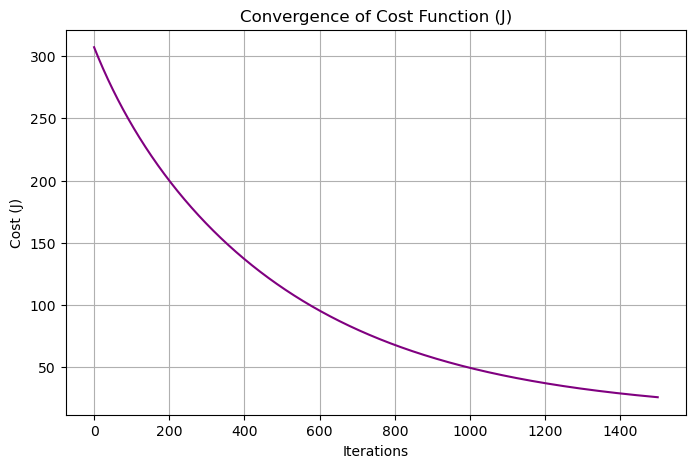

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(J)), J, color='purple')
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Convergence of Cost Function (J)")
plt.grid(True)
plt.show()